# 1. Load Data

# Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load SNP Genotype data

In [2]:
df_rpkms = pd.read_csv("https://www.dropbox.com/s/p2ef992kl2jmmis/matrix_1kg.txt?dl=1",
                       sep = "\t")

df_rpkms

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2.

# Calculate alternate allele frequency


In [6]:
df = df_rpkms.iloc[:, 4:]
df

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
alt_allele_counts = df.sum(axis = 1)
alt_allele_counts

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

In [8]:
total = (2548)*2
total

5096

In [11]:
alt_allele_freq = alt_allele_counts/total
alt_allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

# Histogram

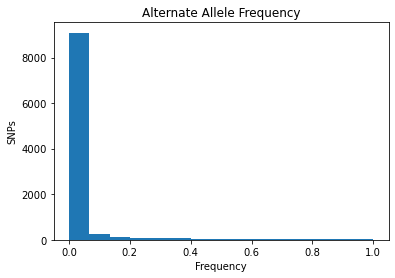

In [18]:
fig, ax = plt.subplots()
ax.hist(alt_allele_freq, bins =15)
ax.set_title("Alternate Allele Frequency")
ax.set_xlabel("Frequency")
ax.set_ylabel("SNPs")
plt.show()

# 3. Fit data frame to "common variation" 

In [21]:
common_variation = alt_allele_freq[(alt_allele_freq<=0.95) & (alt_allele_freq>=0.05)]
common_variation

20      0.080259
32      0.595761
38      0.405612
41      0.094388
46      0.097527
          ...   
9957    0.841837
9959    0.115973
9974    0.180730
9975    0.810047
9980    0.077708
Length: 986, dtype: float64

# 4. PCA

# Merge common variation SNPs index with their counts instead of frequency

In [22]:
common_variation.index

Int64Index([  20,   32,   38,   41,   46,   54,   66,   77,   93,   98,
            ...
            9894, 9904, 9913, 9927, 9929, 9957, 9959, 9974, 9975, 9980],
           dtype='int64', length=986)

In [25]:
common_variation_counts = df.iloc[common_variation.index,:]
common_variation_counts

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


# Transpose data to put column names as row names

In [26]:
pca_input = common_variation_counts.T
pca_input

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


# Standardize

In [28]:
pca_input.mean(axis = 0)

20      0.160518
32      1.191523
38      0.811224
41      0.188776
46      0.195055
          ...   
9957    1.683673
9959    0.231947
9974    0.361460
9975    1.620094
9980    0.155416
Length: 986, dtype: float64

In [29]:
pca_input.var(axis = 0)

20      0.150510
32      0.504333
38      0.525402
41      0.193247
46      0.187694
          ...   
9957    0.287020
9959    0.213553
9974    0.320414
9975    0.349529
9980    0.180783
Length: 986, dtype: float64

In [30]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([-1.56424673e-16, -6.55327876e-16,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  5.70536118e-16,  1.65749152e-16,
        2.45835098e-16,  2.91847481e-16, -6.09446211e-16, -1.71966924e-15,
        1.30866777e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  1.09048476e-15,  5.13979231e-16,
        1.90010226e-15,  3.07794955e-16,  1.41814870e-15,  2.18210240e-16,
        1.21828241e-16, -2.11726677e-15,  1.54158911e-16, -3.32805473e-16,
       -1.36189682e-15, -3.84264398e-16,  1.92110413e-16,  2.84091606e-16,
       -3.47184343e-16,  2.08206032e-15, -4.99861795e-16, -1.89713934e-15,
       -1.42045803e-16, -8.29878639e-16,  2.96379004e-16,  3.13546503e-16,
       -5.90753680e-16, -2.23621923e-15, -6.62038016e-16, -1.99674570e-15,
       -2.44266494e-16, -1.29531829e-15, -5.92017278e-16,  1.59069513e-15,
       -3.25398177e-16, -9.36957646e-16, -7.13496940e-16,  3.40866355e-16,
        1.77016957e-15,  

In [31]:
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [32]:
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-6.14493037, -9.81856656, -1.54684753, ..., -0.14147531,
         1.14740435, -5.89407583],
       [-6.13388414, -8.63182927,  2.55758334, ...,  5.46548672,
        -2.74444564,  0.41288788],
       [-6.23847319, -7.97187002, -0.74584242, ..., -2.34185791,
         0.6554052 ,  0.47103343],
       ...,
       [-4.09694721, -2.8273615 , -4.18083682, ..., -0.74849313,
        -0.99658156,  4.14099397],
       [-6.26346243, -2.58507983, -4.22562925, ..., -0.12875638,
        -0.89579879,  3.55963583],
       [-3.17677867, -0.91694989, -6.45081508, ...,  1.89160686,
        -2.25087488,  2.13923841]])

In [33]:
pca_output.shape

(2548, 10)

In [34]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546848,-5.394343,-0.504325,-0.083164,1.415523,-0.141475,1.147404,-5.894076
1,-6.133884,-8.631829,2.557583,-3.894472,0.311849,-2.400371,0.858877,5.465487,-2.744446,0.412888
2,-6.238473,-7.971870,-0.745842,-4.014549,-0.943268,3.972029,-0.587896,-2.341858,0.655405,0.471033
3,-5.051218,-7.008727,2.805420,-4.761604,4.368222,0.449964,-1.035584,-1.166265,0.419182,0.148938
4,-6.634383,-8.543670,3.072520,-1.594617,-4.372333,0.574490,1.139290,-4.361842,0.798024,0.897641
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665750,3.299598,-0.187831,-0.679137,-2.550768,-1.014193,-0.717027,-1.971260
2544,-6.295888,-3.116491,-5.555325,3.335006,3.338843,3.537896,-1.032763,-4.271325,-2.298850,-0.861424
2545,-4.096947,-2.827361,-4.180837,3.694030,1.563571,0.548414,-1.162106,-0.748493,-0.996582,4.140994
2546,-6.263462,-2.585080,-4.225629,3.894629,-3.926317,-1.646731,-0.632859,-0.128756,-0.895799,3.559636


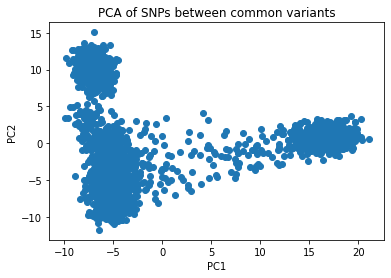

In [37]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title("PCA of SNPs between common variants")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

# 3-D plot

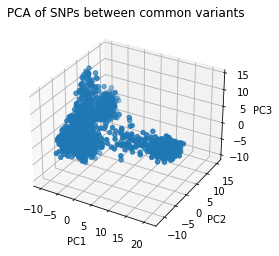

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = pca_output_df['PC1'], ys = pca_output_df['PC2'], zs = pca_output_df['PC3'])
ax.set_title("PCA of SNPs between common variants")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()